<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
# 1 데이터 불러오기
iris_dataset = datasets.load_iris()

In [3]:
# 2 데이터 분할 - 이항 분류
X = iris_dataset.data[50:,:]
y = iris_dataset.target[50:]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 58)

In [4]:
# 3 모델링
logreg = LogisticRegression().fit(X_train, y_train)
logreg


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# 4 결과 비교 C = 1.0
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test,y_test)))
# 결과 : 훈련 세트 점수 : 0.986 테스트 세트 점수 : 0.933

훈련 세트 점수 : 0.957
테스트 세트 점수 : 0.933


In [7]:
# 5 parameter tuning
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

In [8]:
# 5.1 C = 0.1 결과 비교 -> 낮은 코스트 -> 훈련 덜 복잡 -> 강한 규제 -> 과소적합
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수 : 0.914
테스트 세트 점수 : 0.900


In [9]:
# 5.2 C = 100 결과 비교 -> 높은 코스트 -> 훈련 더 복잡 -> 약한 규제 -> 과대적합
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수 : 0.986
테스트 세트 점수 : 0.900


In [11]:
import matplotlib.pyplot as plt


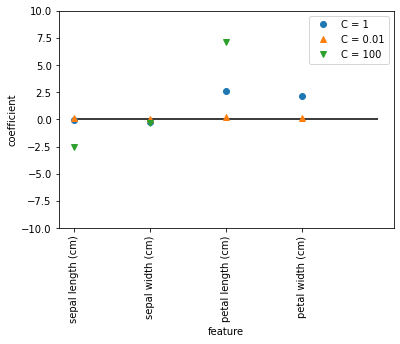

In [12]:
# 6. 그래프
plt.plot(logreg.coef_.T, "o", label = "C = 1")
plt.plot(logreg001.coef_.T, "^", label = "C = 0.01")
plt.plot(logreg100.coef_.T, "v", label = "C = 100")
plt.xticks(range(iris_dataset.data.shape[1]), iris_dataset.feature_names, rotation=90)
plt.hlines(0,0,iris_dataset.data.shape[1])
plt.xlabel("feature")
plt.ylabel("coefficient")
plt.ylim(-10,10)
plt.legend()

- 그래프 결과가 0에 가까울 수록 규제가 강함 -> C값이 작을 수록 훈련 덜 복잡해서 강한 규제  (C = 0.01)
- 강한 규제는 피쳐(특징) 수를 줄이는 것



In [14]:
result = [logreg.predict(X_test), y_test]

In [16]:
import pandas as pd


In [17]:
# 7 적합 결과(예측 결과) 보기
logreg_result = pd.DataFrame(result).T

logreg_result.columns = ["prediction", "observation"]

logreg_result['assessment'] = logreg_result['prediction'] == logreg_result['observation']
logreg_result.head()

,prediction,observation,assessment
0,1,1,True
1,2,2,True
2,1,1,True
3,1,1,True
4,2,2,True


In [23]:
result

[array([1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2,
        1, 1, 2, 2, 1, 1, 1, 2]),
 array([1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2,
        1, 1, 2, 2, 1, 1, 1, 2])]

In [24]:
logreg_result2=pd.DataFrame(result)
logreg_result2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1,2,1,1,2,1,2,2,2,1,1,1,2,2,1,1,1,2,1,2,1,2,1,1,2,2,1,1,1,2
1,1,2,1,1,2,1,2,2,2,1,1,1,2,2,2,1,2,2,1,2,1,2,1,1,2,2,1,1,1,2


- 예측한 결과가 boolean 값으로 assessment 칼럼에 추가 된 것을 확인 할 수 있습니다.